# Project by ChE-origin

Cemre Çelebi  
Özge Duman  
Yiğit Kutlu

## Introduction

Aim of this project is building a classification model which provide highest possible prediction score for given data. There is no deep information about the features.  There are 60 features and some of them are binary. It is known that target column, ‘y’, consists of two classes, ‘a’ and ‘b’. There is an imbalance observed among ‘a’ and ‘b’ which is shown in the table below.  In training side, our performance is evaluated through receiver operating characteristic (ROC), specificity(SPEC) and sensitivity(SENS).  However, balanced error rate (BER), area under the ROC curve(AUC) and total score is received, in test side.





<h6><center> Distribution  of  classes</center></h6>

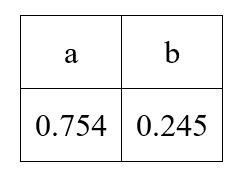

Our best approach is obtained by stochastic gradient boosting method with 800 trees, while its learning rate is 0.01, depth of the tree is 7 and the minimal number of observations per tree leaf is also 5. Performance of  the model is evaluated based on repeated cross validation with 10-folds and 5 times. Finally, best model provided 0.93 AUC and 0.86 BER on the test data. In this project, to get highest possible accuracy, some features are discarded which have absolute zero variance. Additionally, to remove imbalance among classes, weighted training data is created.

## Related Literature

As it is indicated before, there is an imbalanced distribution of the target variable in the data set. In other words, we have much fewer instances for class ‘b’ which leads to poor predictive performance. In our case, majority class is class ‘a’. There are some common methods to overcome class imbalance which are class weights, down-sampling, up-sampling, synthetic minority sampling technique (SMOTE), and randomly over sampling examples(ROSE) (Martin, 2016; Branco et al., 2016; Menardi & Torelli, 2014).  
Class weights are basically adjusting coefficients of cost functions. Giving more weightage to minority class leads to higher penalty on errors made in class ‘b’. Thus, corresponding algorithm tries to reduce these type of errors (Procrastinator, 2020).  
Down-sampling takes random samples from majority class so that its size is equal to minority class. While down-sampling, samples from minority class stay the same. On the other hand, Up-sampling randomly creates samples to minority class with replacement. While up-sampling, samples from majority class stay the same (Kuhn et al., 2018).   
SMOTE is kind of mixture of up and down sampling. While down-sampling, new minority instances synthetize by using nearest neighbors of existing samples  (Chawla et al., 2002; Torgo, 2010).  
ROSE synthetizes samples by expending both attributes of minority and majority classes (Lunardon et al., 2014; Menardi & Torelli, 2014)


## Approach

In this project, we try to build a classification model with highest possible score, four different approach described in the course are applied. The approaches used in building models are Penalized Regression, Decision Tree, Random Forest, and Stochastic Gradient Boosting by using CARET package (Kuhn et al., 2018). 

#### 1.	Penalized Regression Approaches

Penalized regression techniques retain all predictors in the model; however, it regularizes the regression coefficients.  The lasso (Least Absolute Shrinkage and Selection Operator) method, one of the popular penalized regression approaches, is used to build a classification method in this project. Variable selection and regularization are performed in the lasso method (Tibshirani, 1996). L1 regularization is performed in lasso method, which means that penalty used in the model is equal to the absolute value of the coefficients’ magnitude. The goal of lasso method is to minimize the following loss function:

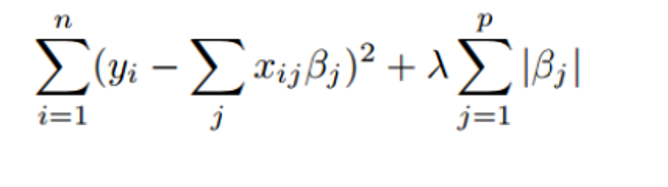

λ is the tuning parameter of lasso method and gives the amount of shrinkage. The model predicted with λ=0 indicates that none of the parameters are eliminated. As λ increases, bias also increases, and variance decreases. 

#### 2.  Decision Tree

Decision tree approach is a tree-based model which performs by partitioning the feature space into smaller districts with similar responses. The predictions are generated by different models for each region. This method is needed very low computer power; however, it is not preferred in more complex algorithms. CART (Classification and Regression Tree) algorithm is used for constructing decision tree in this project (Breiman et al., 1984).  Tuning parameters in decision tree approach are complexity parameter and minbucket number. The complexity parameter is responsible for controlling the size of the decision tree and the value of minbucket determines the smallest number of observations allowed to use in a node. Six different complexity parameters in between 0.0005 and 0.007; and three different minbucket values (8, 10, and 12) are used to tune the decision tree model.

#### 3. Random Forest

Random forest is a classification and regression method that consists of several uncorrelated decision trees. All decision trees have grown under randomization during the learning process. For a classification, each tree in this forest can make a decision and the class with the most votes decides the final classification (Breiman & Leo, 2001). The tuning parameter in random forest called as mtry. The values of mtyr determine the number of variables available for splitting at each tree node. Default value of mtyr for classification is calculated with root mean square of the number of features. In the project, three different mtyr values (3, 5, and 7) are used to tune the random forest model.

#### 4. Stochastic Gradient Boosting

Gradient boosting is one of the most popular methods used in classification and regression models. Gradient boosting model build a group of trees iteratively. Albeit shallow trees are weak models, boosting of these weak models with appropriate tuning parameters can produce best model with among the other methods. Friedman was combined the random forest algorithm with gradient boosting and obtained a new procedure known as stochastic gradient boosting (Friedman & Jerome, 2002).  The tuning parameters used in gradient boosting method are number of trees, learning rate (shrinkage), tree depth, and minimum number of observations in terminal nodes. Four different values (200, 400, 600, and 800) for number of trees; five different values (0.001, 0.003, 0.005, 0.008, and 0.01) for learning rate; five different values (1, 3, 5, 7, and 9) for minimum number of observations are used to tune the model with SGB approach.

#### Data Set Modifications

  
  After applying the methods listed above, feature extraction is performed for x18, x37, x50, x52, and x57, since the variance of these columns are calculated as a value close to zero. Additionally, common methods to overcome class imbalance problem are applied for building new models. These methods are class weights, down-sampling, up-sampling, synthetic minority sampling technique, and rose as explained in the related literature section. The sampling methods are applied with two different ways as outside sampling and inside sampling.  Disadvantages of inside sampling are increased computational time and complications in analysis. Class weight for each instance is calculated as following.


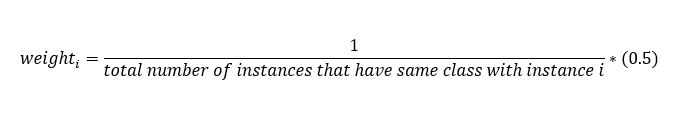

which sums up to 1 for all data set. Constant 0.5 is changed for class weight adjustments.

#### Performance Measurements

  
  As performance measurements balanced error rate (BER) and area under the ROC curve (AUC) are tried to be maximized.  BER represents the average of the error calculated on each class. AUC is a measurement of two-dimensional area under the ROC curve, which plots true positive rates vs false positive rates at different classification thresholds. 



## Results and Discussion

The forementioned approaches are used on training data. Various tuning parameters are used for each method as tuning grids in “trainControl” function. For the first trials, wide range of tuning parameters are used. In order to gain efficiency and reduce the computational time, parameter range narrowed accordingly for the remaining trials. Since we are expected to predict class probabilities, “ROC” values obtained from the training set are considered for choosing the best tuning parameters, sensitivity and specificity values are also considered when making our logical assumptions. The flow of the trial process, parameters, results on the training set and prediction results of each tried model are given below in tables together with our reasonings. 

First, each approach is tried with wide range of tuning parameters. Results for each trial in the first batch given in Table 1 together with the tuning parameters used and ROC, sensitivity and specificity values obtained on the training set. 

<h5><center>Table 1. Results for each trial in the first batch.</center></h5>

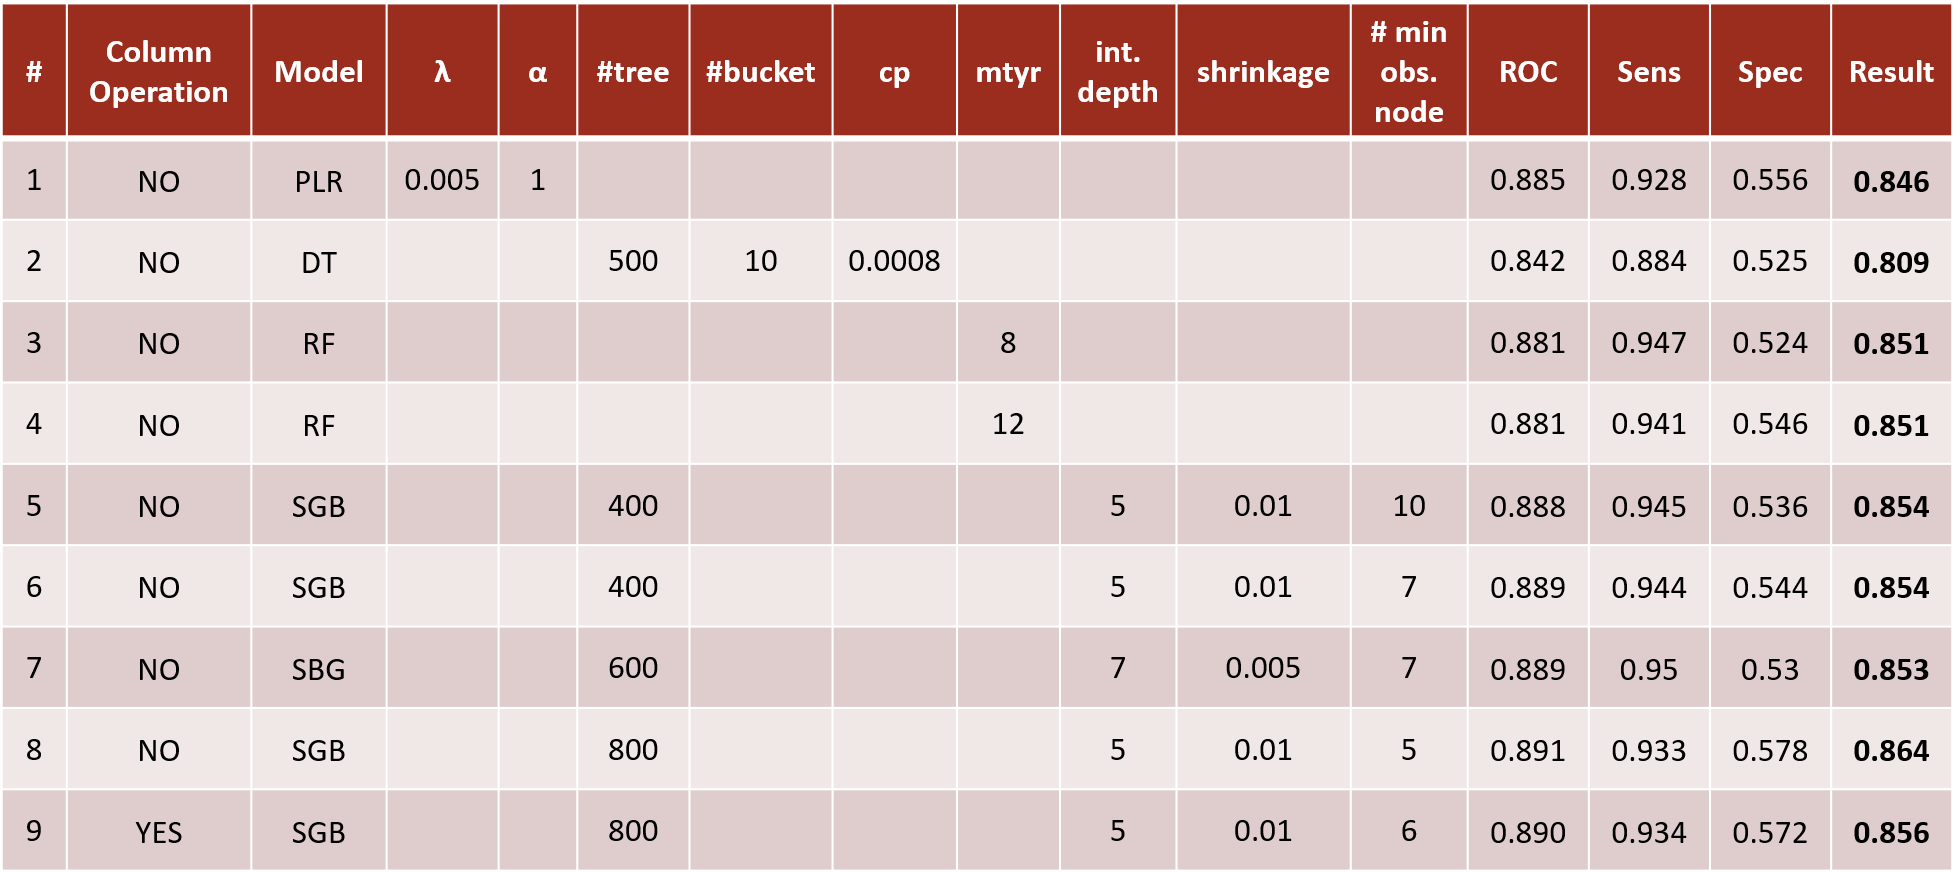

We observe that stochastic gradient boosting approach gives the most promising results. Random forest approach is also noted as second best approach which will also be used in future predictions. We tried some manual adjustments on the tuning parameters, like changing the interaction depth, number of trees etc., to observe the effects on the results and also on the ROC, sensitivity and specificity values. Although we obtained good results on ROC and sensitivity values on training set, specificities of the models are observed to be relatively low, which reflected on the prediction results. For the ninth trial, we decided to remove the features (columns) which has zero or near-zero variance. We decided that these features (namely 18-37-50-52-57) have no or near zero effect on classification and removing them will give efficiency in computational time for training process.  

Since we have a class-imbalance problem, we decided to use class weights and apply some sampling methods which are, as mentioned in the Approach section, down-sampling, up-sampling, and smote sampling. Since we obtained the best results on SGB approach, sampling methods are first tried in SGB models. The results for each trial are given in Table 2.  

<h5><center>Table 2. Results for each trial with sampling methods in SGB.</center></h5>

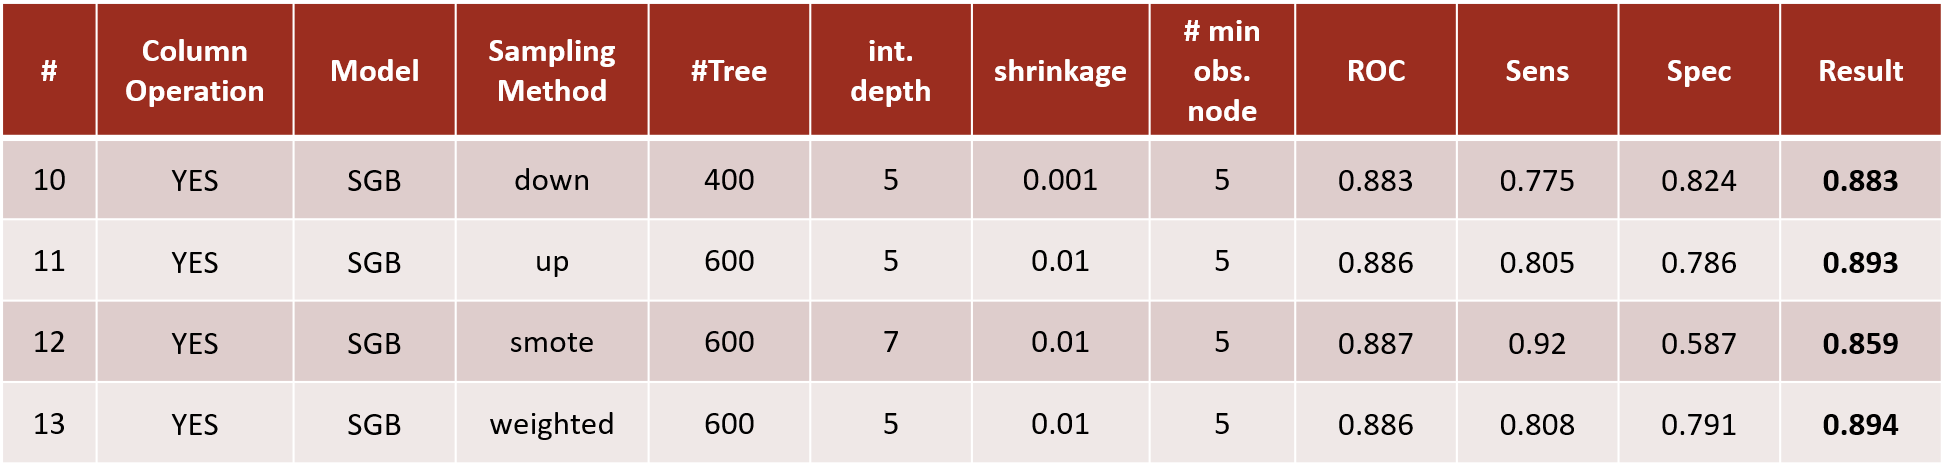

The up-sampling and weighted methods provided a significant increase in prediction results. We also observed that we obtained a great increase in specificity values of the model in the training set. Although the best specificity increase observed in down-sampling method, it also caused the sensitivity value to decrease more than other approaches which is also reflected to prediction results. Since we have a large class imbalance situation, down-sampling reduces the sample size drastically which could be the reason for the sensitivity drop.  

We also decided to try sampling methods on the second-best approach in the first trials which is random forest approach. For the random forest approach, we also implemented another sampling method which is rose sampling. The results for each trial for the random forest models are given in Table 3. 

<h5><center>Table 3. Results for each trial with sampling methods in RF.</center></h5>

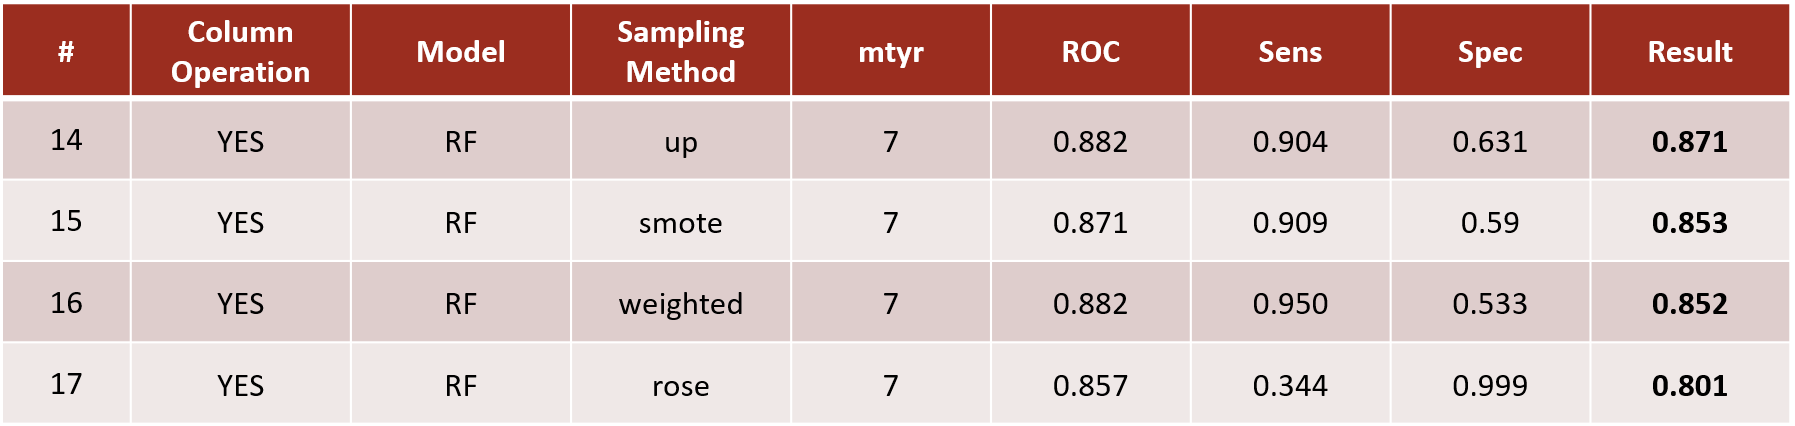

We observed a decent increase in our prediction results with up-sampling compared to no sampling for the random forest approach. Other sampling methods did not provide any decent increase for the prediction results. On the other hand, we observed that the increase in the prediction results for random forest models are not as good as what is obtained with the stochastic gradient boosting models. 

It is also possible to implement sampling methods before the training process. The idea here is to generate synthetic instances to discard the class imbalance situation which provides a balanced training set. The training process is then performed on the newly created synthetic sets. Although the idea is similar in both sampling approaches, the effects on prediction results may differ. So, we tried the sampling processes before the training process instead of doing them simultaneously. The results of out sampling approaches on stochastic gradient boosting models are given in Table 4.  

<h5><center>Table 4. Results for each trial with outside sampling methods in SGB.</center></h5>

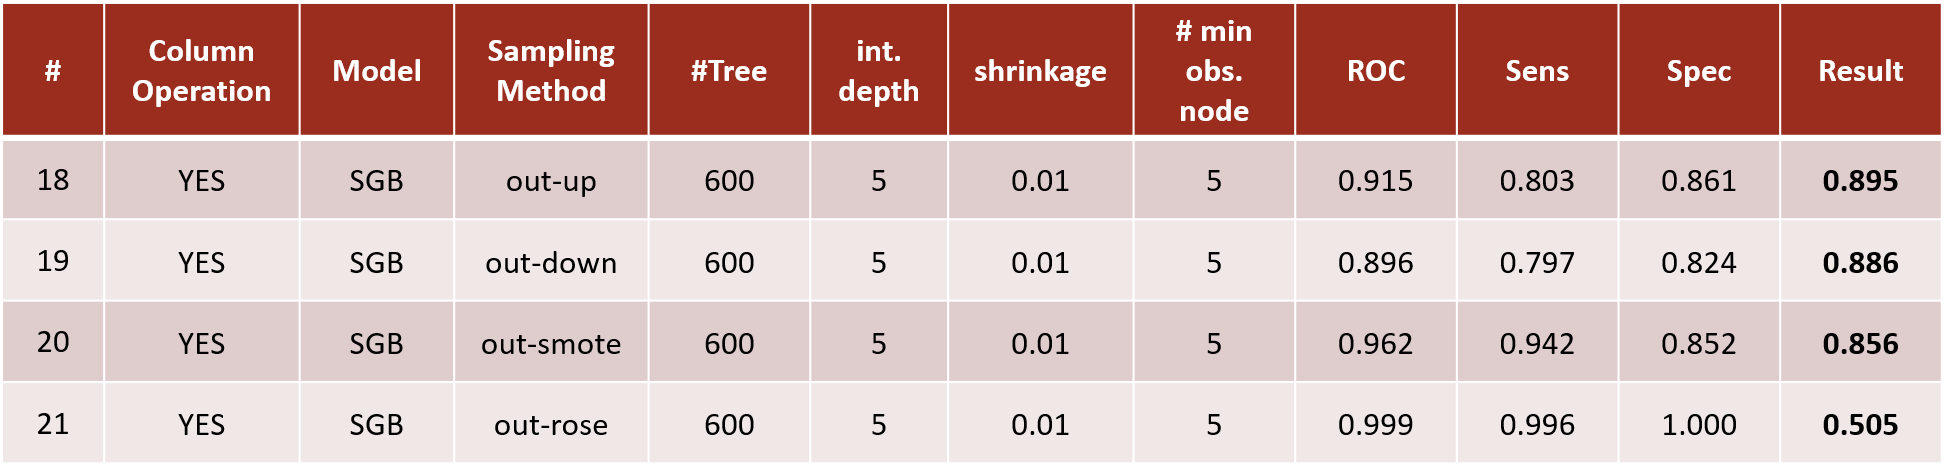

The problem of the out-sampling approach is that ROC, sensitivity, and specificity values are given for the newly generated (synthetic) sets which may be misleading. As seen in Table 4, ROC, sensitivity, and specificity values for rose sampling seems near perfect but our prediction result is the worst. The out up-sampling approach give the best prediction result, better than the previous up-sampling and weighted models.  

We also obtained very good result for weighted approach, and we decided to try different tunning parameters for weighted approach. We also tried a hybrid approach with smote sampling and weights. As it can be observed on Table 5, we did not obtain any significant improvement in our prediction results. 

<h5><center>Table 5. SGB results for different tuning parameters.</center></h5>

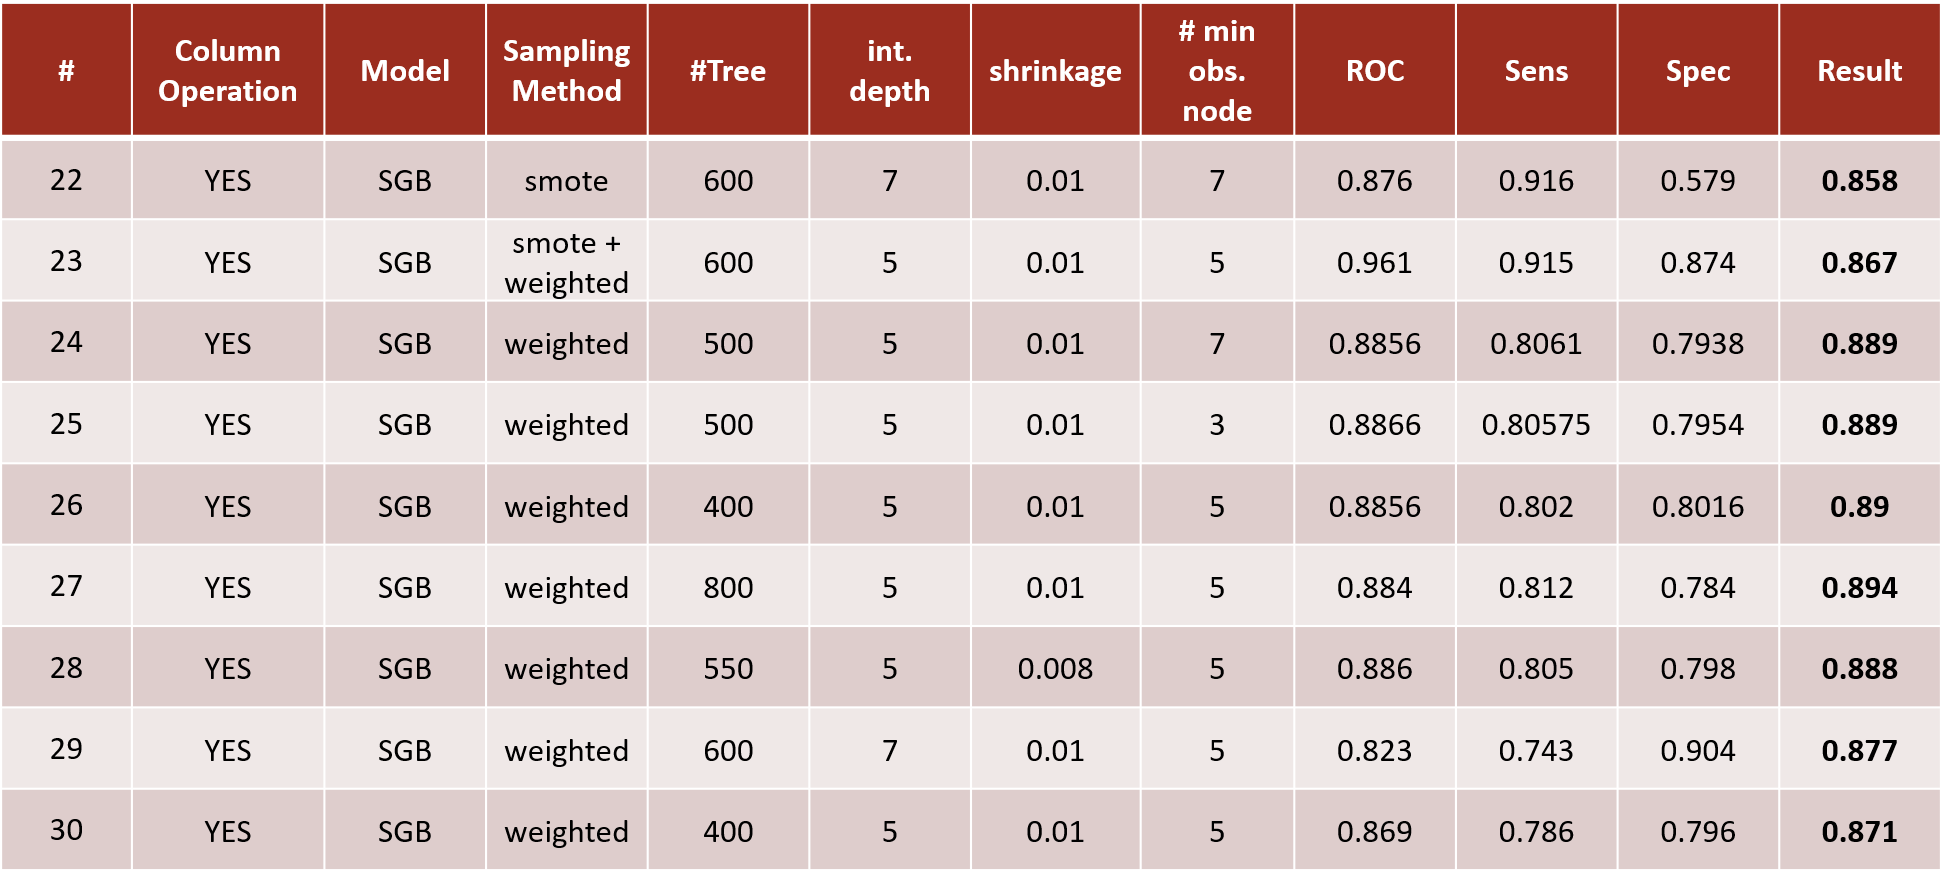

Finally, we decided to focus on the two best results obtained so far which are out-up-sampling and weighted approach. For the weighted approach, we decided to change the weights of the classes manually. We decreased and increased the weight of the minority class by small amounts. For the out up-sampling approach, range of the tunning parameters are increased. The results are given in Table 6. 

<h5><center>Table 6. Results with best sampling methods in SGB.</center></h5>

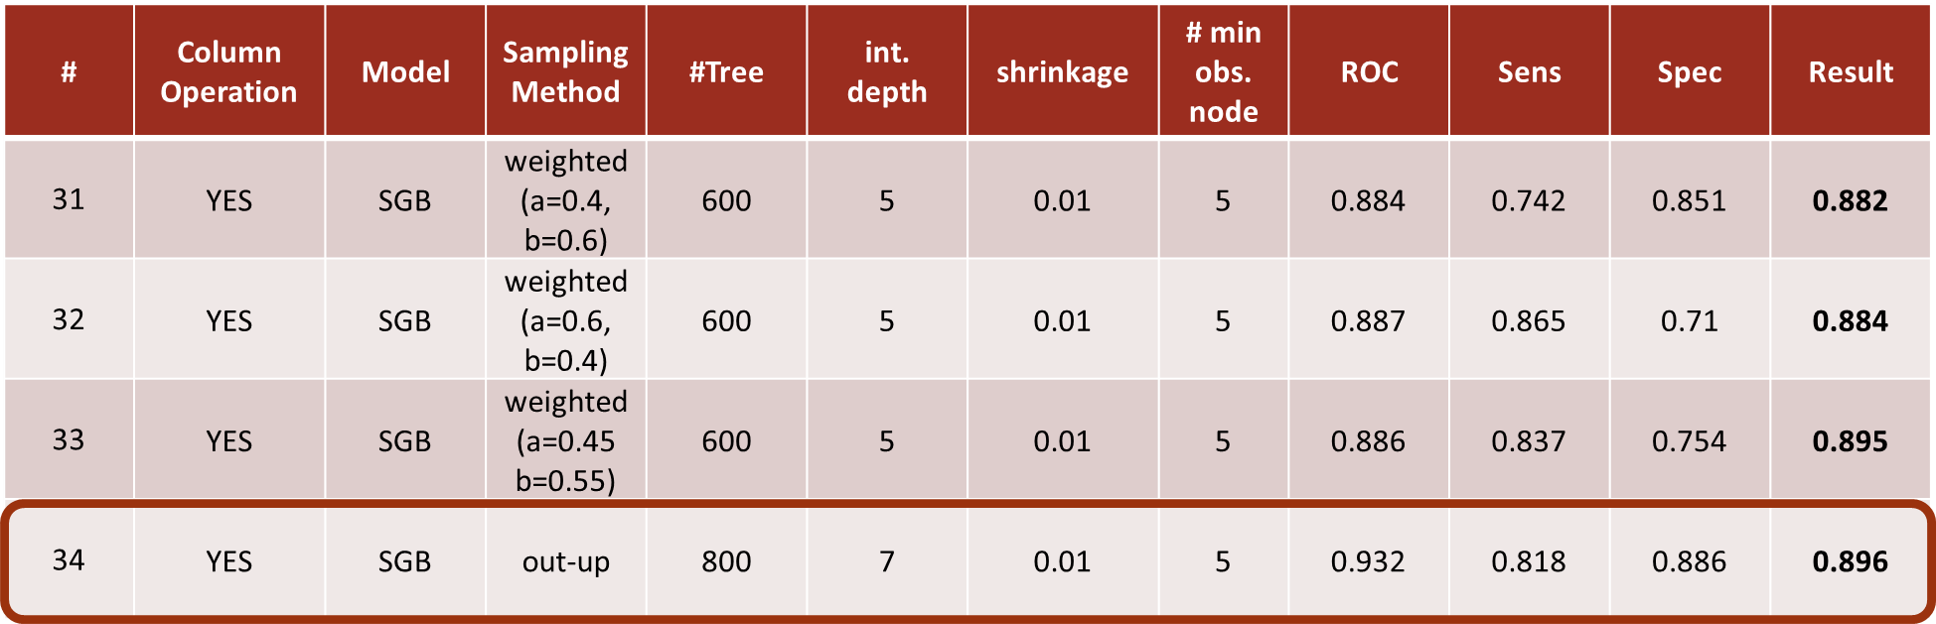

As it can be observed in Table 6, increasing the weight of the minority class by 0.05 give better result in predictions. The best prediction result is obtained with the out up-sampling approach on stochastic gradient boosting model when the parameters are set as following; number of trees = 800, interaction depth = 7, shrinkage = 0.01, minimum observations in node = 5. The prediction result is obtained as 0.896 with the final model.  

The graph given below shows us the relative influence of the features in dataset. According to results, it can be concluded that the feature "x23" has the most valuable effect in the best model.

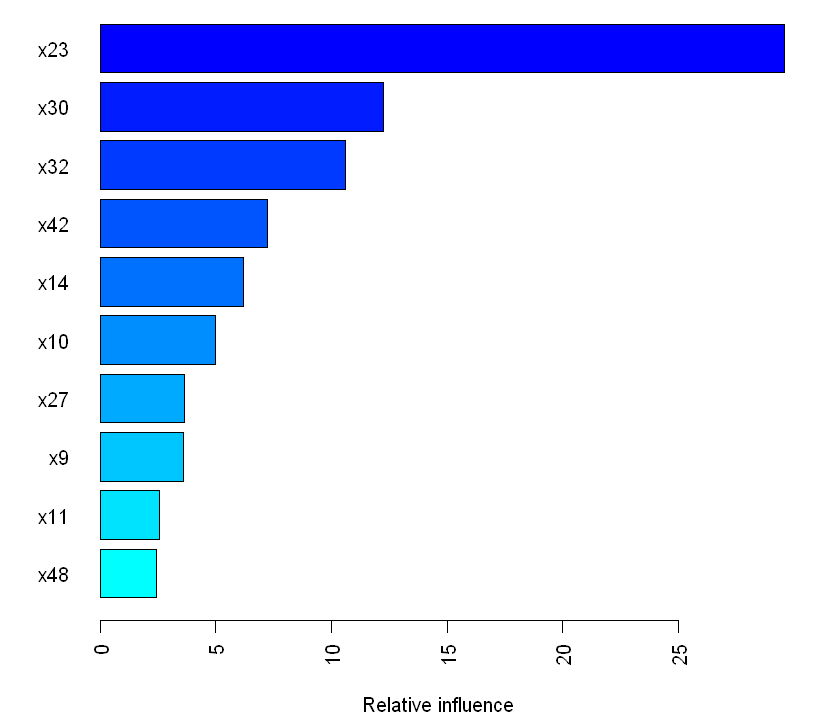

## Conclusions and Future Work

In the project, we are given a task to build a classification model for the given data based on the methods described in the course to give best possible prediction score. Prediction score is based on balanced error rate and area under the ROC curve. We are given a training set which consist of 60 features and a target which contains 2 classes “a” and “b” and a test set in which the classes are labeled as unknowns. The given training data set has a class imbalance situation.

The models used in the project are penalized linear regression, decision tree, random forest, and stochastic gradient boosting. We also implemented class weights and some sampling methods to overcome the class imbalance situation. The best prediction scores are obtained with stochastic gradient boosting models and weighted and up-sampling methods provided better results. The best score is obtained with out up-sampling method with stochastic gradient boosting model.

For class imbalance situations, we observed that a weighted approach or a sampling approach is essential for better prediction results. For the given data, up-sampling approach provided the best results. We believe that down-sampling underperformed because it reduced the sample size drastically which caused the model to underperform. Rose and smote sampling methods are also outperformed by up-sampling method. The given data may not be suitable for these methods or maybe other pre-processing methods needed for rose and smote sampling methods to perform better. 

For model parameters, a wide variety of parameter tuning is performed for stochastic gradient boosting models during the project. We observe that we obtain better results when we increase the number of trees (number of iterations) to the limits of 400, 600 and 800. We observe a decrease in the predictions when the number of trees is greater than 800, no matter what the other parameters are. Shrinkage, which also known as learning rate, is observed to give best results when it is set to 0.01. We tried small adjustments to shrinkage values, but we did not observe any increase in the prediction scores. For the complexity of the tree (interaction depth) and the minimum number of training set samples in a node to commence splitting (n.minobsinnode) we observed better results for values 5 and 7. Since the parameters also influence each other’s performance, for each trial we provided a grid with the mentioned numbers for parameters. For the weighted approach, we obtained the best result when the number of trees is set to 600, interaction depth is set to 5 and n.minobsinnode is set to 5. On the other hand, the overall best score is obtained with out up-sampling method with different parameters. In that model, the number of trees is set to 800, interaction depth is set to 7 and n.minobsinnode is set to 5. We observe that for each new approach a new set of parameters may give better results, so it is advised to try a set of parameters whenever a new approach is implemented to the model.

Although we have tried many combinations of model parameters, in order to increase the prediction scores, it is possible to fine tune the parameters with stronger computational power which enables an increase to parameter grid size. 

For data set modification, we only removed the near zero variance features which we believe that had no effect on classification. However, further modifications to the features, like grouping the features based on frequencies, interactions etc. or implementing new features based on descriptive statistics may provide better prediction results.

## Code

You can access the code with this link: https://bu-ie-582.github.io/fall20-yigitkutlu/files/project_ChE-origin%20-Final.html


## References

Branco, P., Torgo, L., & Ribeiro, R. P. (2016). A survey of predictive modeling on imbalanced domains. ACM Computing Surveys (CSUR), 49(2), 1-50. 

Breiman, L., Friedman, J. H., Olshen, R., & Stone, C. J. (1984). Classification and regression decision trees. Monterey, CA: Wadsworth & Brooks.

Breiman, Leo. (2001). Random Forests. Machine Learning 45 (1). Springer: 5–32.

Chawla, N. V., Bowyer, K. W., Hall, L. O., and Kegelmeyer, W. P. (2002). Smote: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16:321-357.

Friedman, Jerome H. 2001. Greedy Function Approximation: A Gradient Boosting Machine. Annals of Statistics. JSTOR, 1189–1232.

Kuhn, M., Wing, J., Weston, S., Williams, A., Keefer, C., & Engelhardt, A. (2018). Classification and Regression Training. R package version 6.0–81.

Lunardon, N., Menardi, G., and Torelli, N. (2014). ROSE: a Package for Binary Imbalanced Learning. R Jorunal, 6:82--92

Martin, D. P. (2016). Handling Class Imbalance with R and Caret - An Introduction: Wicked Good Data. Retrieved from: https://dpmartin42.github.io/posts/r/imbalanced-classes-part-1.

Menardi, G. and Torelli, N. (2014). Training and assessing classification rules with imbalanced data. Data Mining and Knowledge Discovery, 28:92--122.

Procrastinator. (2020). How to Improve Class Imbalance using Class Weights in Machine Learning. Analytics Vidhya. Retrieved from: https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/.

Tibshirani, R. (1996). Regression shrinkage and selection via the lasso. Journal of the Royal Statistical Society: Series B (Methodological), 58(1), 267-288.

Torgo, L. (2010) Data Mining using R: learning with case studies, CRC Press (ISBN: 9781439810187).